# Exploratory Data Analysis

Cette section vise à explorer les relations entre le temps d’écran quotidien et les indicateurs de bien-être psychologique.

Nous cherchons à identifier des tendances visuelles et un éventuel seuil critique d’utilisation des réseaux sociaux.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [40]:
df = pd.read_csv("../data/data_cleaning.csv")

## Distribution du temps d’écran quotidien

Nous commençons par analyser la distribution du temps d’écran afin de comprendre les habitudes d’utilisation au sein de l’échantillon.

Cela permet d’identifier la concentration des utilisateurs et la présence éventuelle d’usages intensifs.


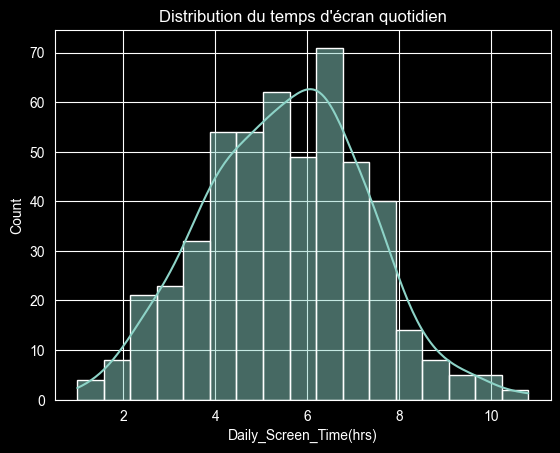

In [41]:
sns.histplot(df["Daily_Screen_Time(hrs)"], kde=True)
plt.title("Distribution du temps d'écran quotidien")
plt.show()

## Stress selon le temps d’écran

Nous analysons ici la relation entre le temps d’écran quotidien et le niveau de stress (échelle de 1 à 10).

Les boxplots permettent de comparer les médianes et la dispersion entre les différents groupes d’utilisation (0–2h, 2–4h, 4–6h, 6h+).

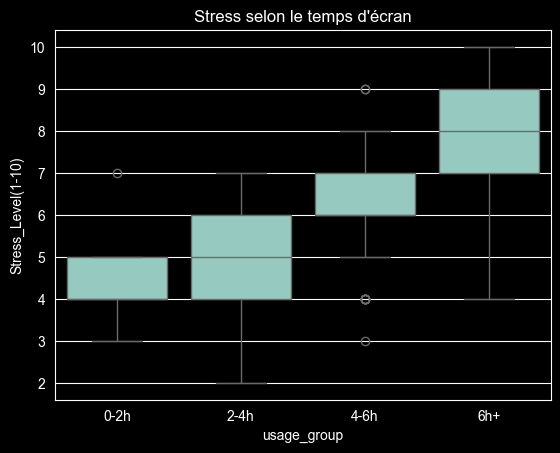

In [42]:
sns.boxplot(
    x="usage_group",
    y="Stress_Level(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)

plt.title("Stress selon le temps d'écran")
plt.show()

## Qualité du sommeil selon le temps d’écran

Nous observons maintenant l’évolution de la qualité du sommeil selon les groupes d’utilisation.

Une diminution progressive du score pourrait indiquer un impact négatif d’un usage intensif des réseaux sociaux.

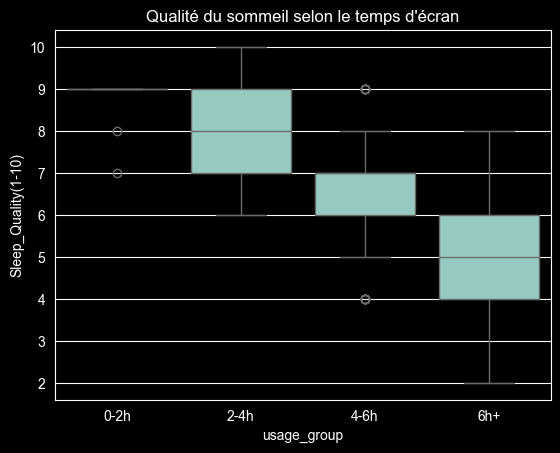

In [43]:
sns.boxplot(
    x="usage_group",
    y="Sleep_Quality(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)
plt.title("Qualité du sommeil selon le temps d'écran")
plt.show()

## Indice de bonheur selon le temps d’écran

L’indice de bonheur (1–10) est analysé afin d’évaluer si une utilisation excessive est associée à une baisse du bien-être général.

Nous cherchons à détecter un éventuel seuil critique.

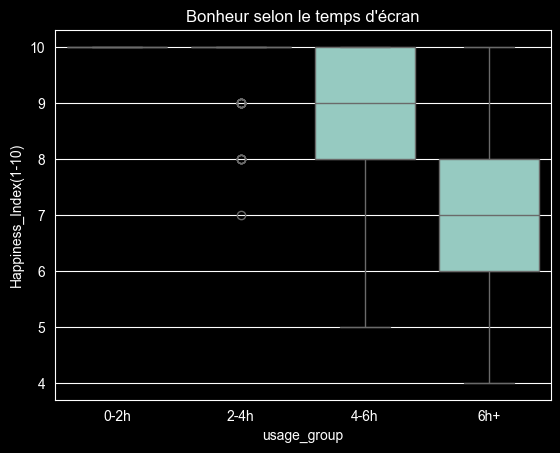

In [44]:
sns.boxplot(
    x="usage_group",
    y="Happiness_Index(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)
plt.title("Bonheur selon le temps d'écran")
plt.show()

## Matrice de corrélation

La matrice de corrélation permet d’examiner les relations linéaires entre les variables numériques du dataset.

Une corrélation positive indique que les variables évoluent dans le même sens.
Une corrélation négative indique une relation inverse.

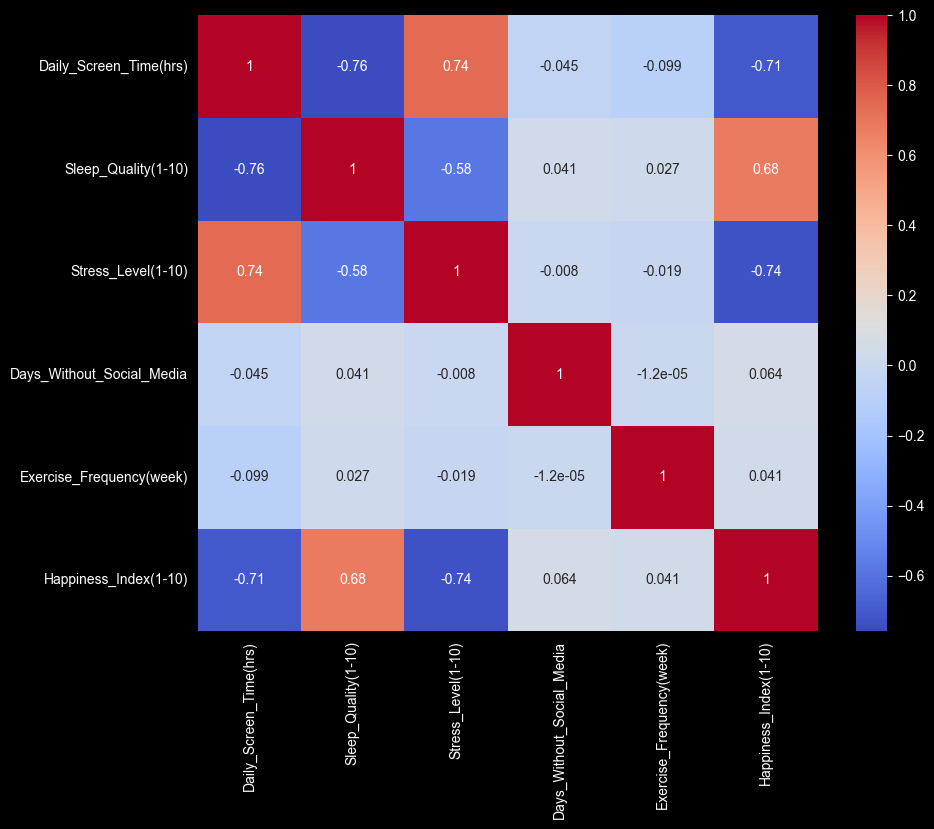

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

On observe que les variables Stress_Level, Sleep_Quality et Happiness_Index présentent des corrélations significatives avec le temps d’écran quotidien.

Le stress tend à augmenter lorsque le temps d’écran augmente, tandis que la qualité du sommeil et l’indice de bonheur tendent à diminuer.

Ces premières observations visuelles suggèrent une relation potentielle entre usage intensif et dégradation du bien-être.

## Validation statistique – ANOVA

### Stress

L’analyse de variance (ANOVA) montre une différence statistiquement significative du niveau de stress entre les groupes de temps d’écran.

La valeur élevée du statistic F indique que les moyennes des groupes diffèrent fortement, et la p-value extrêmement faible (p < 0.001) confirme que cette différence n’est pas due au hasard.

Nous rejetons donc l’hypothèse d’égalité des moyennes.

In [46]:
groups = [group["Stress_Level(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(159.51470648692916), pvalue=np.float64(2.2567347428757552e-72))

### Qualité du sommeil

L’ANOVA confirme également une différence significative de la qualité du sommeil selon les groupes d’utilisation.

Cela suggère que l’usage intensif des réseaux sociaux est associé à une variation significative du sommeil.

In [47]:
groups = [group["Sleep_Quality(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(152.0437219586604), pvalue=np.float64(7.147143325037709e-70))

### Indice de bonheur

L’analyse montre également une différence significative du niveau de bonheur entre les groupes.

Les utilisateurs intensifs présentent en moyenne un indice de bonheur plus faible que les utilisateurs modérés.

In [48]:
groups = [group["Happiness_Index(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(119.71377811293327), pvalue=np.float64(2.495782257656648e-58))

## Analyse selon le genre

Nous examinons si l’impact du temps d’écran varie selon le genre.

Cette analyse permet d’identifier d’éventuelles différences dans la sensibilité au stress selon les profils démographiques.

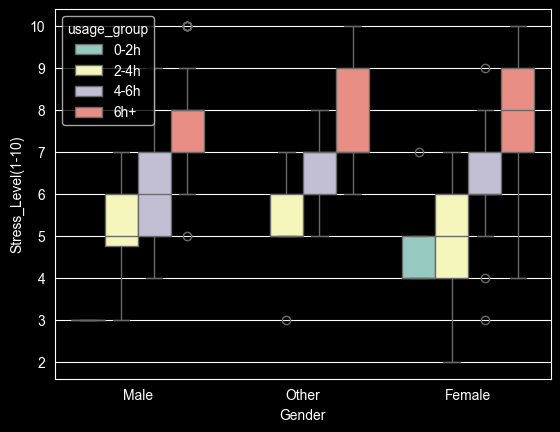

In [52]:
sns.boxplot(
    x="Gender",
    y="Stress_Level(1-10)",
    hue="usage_group",
    data=df,
    hue_order=["0-2h", "2-4h", "4-6h", "6h+"]
)

plt.show()

On observe une tendance à une utilisation plus élevée des réseaux sociaux chez certains groupes de genre.

Cependant, l’augmentation du stress au-delà de 4 heures semble observable pour l’ensemble des genres, ce qui suggère que l’effet du temps d’écran est relativement transversal.

# Conclusion générale

Cette étude visait à déterminer si un seuil critique d’utilisation des réseaux sociaux pouvait être identifié.

Les analyses montrent :

- Une augmentation significative du stress au-delà de 4 heures quotidiennes.
- Une diminution de la qualité du sommeil.
- Une baisse de l’indice de bonheur.
- Des différences statistiquement validées par l’ANOVA (p < 0.001).

Un seuil critique semble apparaître autour de 4 heures d’utilisation quotidienne.

Il est toutefois important de rappeler que cette étude met en évidence des corrélations et non une causalité directe.

Les données étant auto-déclarées, elles peuvent comporter des biais.

Ces résultats suggèrent néanmoins qu’un usage modéré des réseaux sociaux pourrait être associé à un meilleur équilibre psychologique.